In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io #importacion de libreria de de optimizacion
import math
#la importacion de librerias

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%pwd
%cd "/content/drive/MyDrive/Colab Notebooks/Red_Neuronal"
%pwd


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Red_Neuronal


'/content/drive/MyDrive/Colab Notebooks/Red_Neuronal'

In [ ]:
from RandParametros import randParametros #en la libreria pueden haber barias funciones, el epsilon es el que meda el rango de los numeros aleatorios.
from fming import fmincg #
from organizarBeta import organizarBeta

#importacion de extenciones, donde se encentran las funciones de busqueda

In [ ]:
mat = scipy.io.loadmat('datos4.mat') # se trae los datos de entrnamiento y como estan organizados en otro programa por eso utilizamos scipy.io.loadmat
x_data = mat['X']; #segregacion de datos trayendo solo a X
y_data = mat['y']; #segregacion de datos trayendo solo a Y
#print(x_data[0,:])
#aca le indicamos que nos traga la array que llamamos X-Y.

[8]


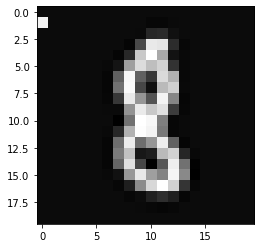

In [ ]:
cont = 0
DatSetImage = np.zeros((20,20))
ImageNumber = 4449 #aca se coge un dato

for i in range(20): # se le seleccion la matriz que va a acumular los datos.
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont] #aca se reune todos los datos para mostrar la imagen del numero, el contador se utiliza para acumular.
    cont+=1

plt.imshow(DatSetImage,cmap='gray')
print(y_data[ImageNumber])

In [ ]:
from numpy.ma.core import size
#Dividir datos de Entrenamiento en 70% y 30%
j=0
c=len(x_data)
cont2=500
#x_data_30 = #se debe de llamar el 30% por cada clase para no dejar datos por fuera del entrenamiento
#y_data_30 =
#for j in range(c):
 # x_data_70 = x_data[0:cont2] #se debe de llamar el 70% por cada clase para no dejar datos por fuera del entrenamiento
  #cont2+=1

#p_train = 0.70 # Porcentaje de train.

#train = x_data[:int((len(x_data))*p_train)]
#test = x_data[int((len(x_data))*p_train):]

p_train = 0.70 # Porcentaje de train.

x_data_70['is_train'] = np.random.uniform(0, 1500, len(x_data))* p_train
train, test = x_data[x_data['is_train']==True], x_data[x_data['is_train']==False]
x_data = x_data.drop('is_train', 1)
#y_data_70 =

#Calcular la m a partir de x_data_70
print(x_data_70)


[6]


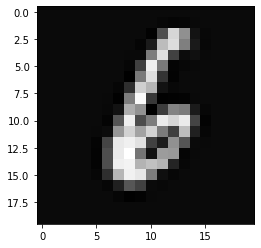

In [ ]:
cont = 0
DatSetImage = np.zeros((20,20))
ImageNumber = 3499 #aca se coge un dato

for i in range(20): # se le seleccion la matriz que va a acumular los datos.
  for j in range(20):
    DatSetImage[j,i] = train[ImageNumber,cont] #aca se reune todos los datos para mostrar la imagen del numero, el contador se utiliza para acumular.
    cont+=1

plt.imshow(DatSetImage,cmap='gray')
print(y_data[ImageNumber])

In [ ]:
Beta1_grad = 0;
Beta2_grad = 0;

tamano_capa_entrada  = 400; #como el la R.N, el tamaño de entrada de la capa 1
tamano_capa_media = 25; #el tamaño de entrada de la capa 2
num_salidas =  10; #el tamaño de entrada de la capa 3

In [ ]:
#inicializacion de BETAS
Beta1_inicial = randParametros(tamano_capa_entrada,tamano_capa_media);
Beta2_inicial = randParametros(tamano_capa_media, num_salidas);
parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial),axis=None) #
#print(parametros_Beta_Iniciales)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],)) #
#print(parametros_Beta_Iniciales)

In [ ]:
#ORGANIZA LOS BETA DIFERENCIANDOLOS EN CADA UNO.
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Iniciales)

In [ ]:
#Esta celda debe ser finalizada
def nnFunction1(nn_params,tamano_capa_entrada,tamano_capa_media,num_salidas, x, y, Lambda,m): #X es el 70% de los datos de entrenamiento

    [Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,nn_params)
    dataSize = x_data_70.shape
    m = dataSize[0]
    J1 = 0 #variables auxiliares para realizar los calculos
    Sum1 = 0
    Sum2=0
    acum1 = 0
    acum2 = 0

    for t in range(m):
        #Propagacion hacia adelante X =x_data_70[m,:]
        X = x_data_70[t,:]  #(400,1)
        a1 = np.concatenate((1,X), axis = None) #la matriz nos queda de (401,)
        a1 = np.reshape(a1,(401,1)) #convierte la matriz de (401,) a (401,1)
        z2 = np.dot(Beta1,a1) #(25,401) multiplica Beta1 con la transpuesta de a1
        g2 = 1/(1+(1/np.exp(z2))) #funcion g(z)
        a2 = np.concatenate((1,g2[:,0]), axis = None) # trabajos en la capa 2
        a2 = np.reshape(a2,(26,1))
        z3 = np.dot(Beta2, a2)
        g3 = 1/(1+(1/np.exp(z3)))
        a3 = g3

        #Paso intermedio


        #Propagacion hacia atras





        #Acumuladores



        #Funcion cost(J) parte 1
        J1=

    #Funcion cost(J) parte 2

    J=J1+



    #Calculamos gradientes
    Beta1_grad =
    #print(Beta1_grad.shape)
    Beta2_grad =
    #print(Beta2_grad.shape)

    grad = np.concatenate((Beta1_grad,Beta2_grad),axis=None)
    #tam = grad.size
    #grad.resize(tam,1)
    retornar = [J,grad]
    return retornar

In [ ]:
#Celda de prueba

Lambda = 0.1
retornar = nnFunction1(parametros_Beta_Iniciales,tamano_capa_entrada,tamano_capa_media,num_salidas, x_data,y_data, Lambda)
print(retornar[0])

In [ ]:
def costFuncition(p):
    ret = nnFunction1(p,tamano_capa_entrada,tamano_capa_media,num_salidas,x_data_30,y_data_30,Lambda,m)
    return ret


In [ ]:
options = {'maxiter' : 15}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFuncition,parametros_Beta_Iniciales,options)

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Finales)
print(len(parametros_Beta_Finales))
print(Beta2)

In [ ]:
#Cálcular Matriz de Confución con el 30% de los datos